# Data Massaging || Masajeo de Datos

Libreria Pandas
- La libreria mas comun utilizada para Maniopulacion y analisis de datos
- Flexibilidad y potencia para manejar datos
- Importacion de datos a una estructura Pandas : DataFrame / DF
- Buqueda de datos, seleccion y filtro
- Operaciones basicas con DF

## Introduccion

In [86]:
# Importacion
import pandas as pd

# Otras librerias necesarias y utiles para usar pandas
import numpy as np

In [ ]:
# Lectura del documento csv

df = pd.read_csv("../../../Archivos-Analisis/netflix_titles.csv")
df

In [ ]:
# Ver registros desde un rango
df[0:10]

In [ ]:
# Ver primeros registros
df.head(5)

In [6]:
# Ver ultimos registros
df.tail(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [7]:
# Ver registros aleatorios
df.sample(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6125,s6126,Movie,Alpha and Omega: The Legend of the Saw Tooth Cave,Richard Rich,"Debi Derryberry, Ben Diskin, Kate Higgins, Lin...","United States, India","January 1, 2020",2014,TV-Y7,45 min,Children & Family Movies,When a wolf pup named Runt sneaks off to explo...
7580,s7581,Movie,Newtown,Kim A. Snyder,NaN,United States,"April 7, 2017",2016,NR,84 min,Documentaries,This intimate portrait sheds light on the trau...
6643,s6644,Movie,Dragonheart: A New Beginning,Doug Lefler,"Christopher Masterson, Harry Van Gorkum, Rona ...",United States,"January 1, 2020",2000,PG,84 min,"Action & Adventure, Sci-Fi & Fantasy",This sequel introduces Draco the dragon's offs...
7325,s7326,TV Show,Lo que la vida me robó,NaN,"Angelique Boyer, Sebastián Rulli, Luis Roberto...",Mexico,"December 31, 2017",2013,TV-14,1 Season,"Crime TV Shows, International TV Shows, Romant...","In seaside Aguazul, beautiful Montserrat and h..."
1544,s1545,Movie,Grizzlies,Miranda de Pencier,"Ben Schnetzer, Emerald MacDonald, Booboo Stewa...",Canada,"December 15, 2020",2018,R,106 min,"Dramas, Independent Movies, Sports Movies",A group of disaffected students form an unlike...


In [8]:
# Se puede generar datos sobre los datos (metadata), de manera automatica con [describe]
df.describe().T

,count,mean,std,min,25%,50%,75%,max
release_year,8807.0,2014.180198,8.819312,1925.0,2013.0,2017.0,2019.0,2021.0


In [9]:
# Para ver el numero de Filas y Columnas
df.shape

(8807, 12)

In [10]:
# Ver Tipos de datos
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

## Agrupaciones

In [11]:
df.groupby("type").count() # Ceunta por cada tipo de show

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
type,,,,,,,,,,,
Movie,6131,6131,5943,5656,5691,6131,6131,6129,6128,6131,6131
TV Show,2676,2676,230,2326,2285,2666,2676,2674,2676,2676,2676


In [12]:
df.groupby("type").count()["country"] # Cuenta por cada pais

type
Movie      5691
TV Show    2285
Name: country, dtype: int64

In [13]:
# Cuenta los principales numeros de shows en los paices
#df.groupby("country").count()["show_id"].sort_values(ascending=False)

df.groupby("country").count()["show_id"].sort_values(ascending=False)[:10] # Busca el top 10

country
United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: show_id, dtype: int64

<Axes: xlabel='country'>

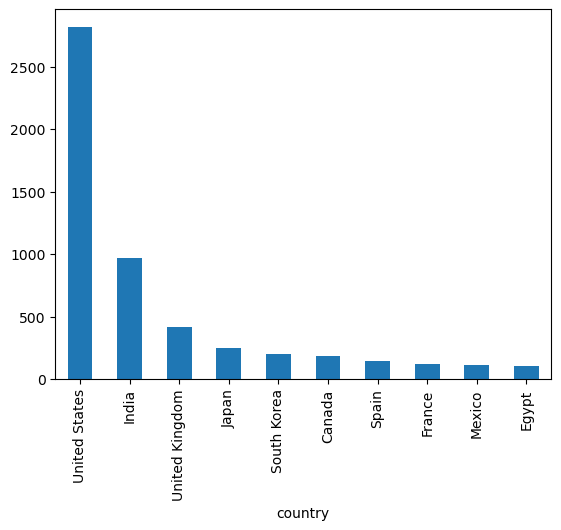

In [14]:
df.groupby("country").count()["show_id"].sort_values(ascending=False)[:10].plot.bar()

In [15]:
# Por director
df.groupby("director").count()["country"].sort_values(ascending=False)[:10]

director
Raúl Campos, Jan Suter    18
Marcus Raboy              15
Jay Karas                 14
Cathy Garcia-Molina       13
Youssef Chahine           12
Martin Scorsese           12
Jay Chapman               12
Steven Spielberg          11
Don Michael Paul          10
David Dhawan               9
Name: country, dtype: int64

## Conversion a Numpy

In [16]:
# Convierte el DF a una estructura de numpy (.to_numpy())
df.to_numpy()

array([['s1', 'Movie', 'Dick Johnson Is Dead', ..., '90 min',
        'Documentaries',
        'As her father nears the end of his life, filmmaker Kirsten Johnson stages his death in inventive and comical ways to help them both face the inevitable.'],
       ['s2', 'TV Show', 'Blood & Water', ..., '2 Seasons',
        'International TV Shows, TV Dramas, TV Mysteries',
        'After crossing paths at a party, a Cape Town teen sets out to prove whether a private-school swimming star is her sister who was abducted at birth.'],
       ['s3', 'TV Show', 'Ganglands', ..., '1 Season',
        'Crime TV Shows, International TV Shows, TV Action & Adventure',
        'To protect his family from a powerful drug lord, skilled thief Mehdi and his expert team of robbers are pulled into a violent and deadly turf war.'],
       ...,
       ['s8805', 'Movie', 'Zombieland', ..., '88 min',
        'Comedies, Horror Movies',
        'Looking to survive in a world taken over by zombies, a dorky college st

## Agregacion de columnas / Cambion de tipo de dato

In [17]:
# Se generara la duracion de la pelicula numericamente
# Como primer paso se generara una nueva columna para no modificar la estructura original
df["duration_num"] = df["duration"]

In [18]:
# Generamos un campo adicional de unidades, para guardar la informacion que podra ser min o season
df["duration_unit"] = ""

In [19]:
# Como primer paso, cambiamos el tipo de la columna de las columnas de duracion
df["duration_unit"] = df["duration_unit"].astype(pd.StringDtype()) # Se cambia a tipo string

In [20]:
# Si se requiere hacer para mas columnas a la vez (todas del mismo tipo)
# Podria primero buscar todas las columnas de ese tipo
df.select_dtypes(include="object").columns

# Y aplicamos el cambio

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'rating', 'duration', 'listed_in', 'description', 'duration_num'],
      dtype='object')

In [21]:
# Cambiamos el tipo de dato
string_col = df.select_dtypes(include="object").columns # Lo guardamos en un DF
df[string_col] = df[string_col].fillna("").astype(pd.StringDtype())

In [22]:
# Comprobamos
df.dtypes

show_id          string[python]
type             string[python]
title            string[python]
director         string[python]
cast             string[python]
country          string[python]
date_added       string[python]
release_year              int64
rating           string[python]
duration         string[python]
listed_in        string[python]
description      string[python]
duration_num     string[python]
duration_unit    string[python]
dtype: object

## Graficacion sencilla

<Axes: >

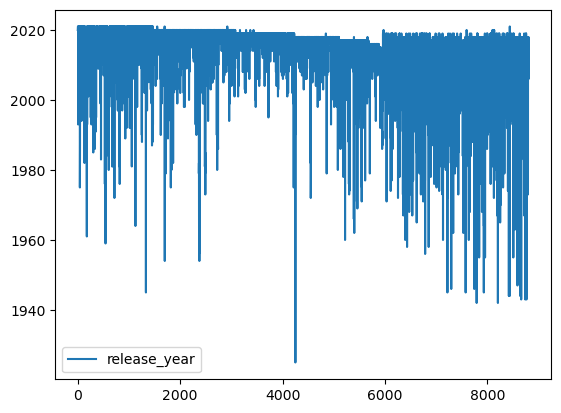

In [23]:
df.plot()

<Axes: ylabel='Frequency'>

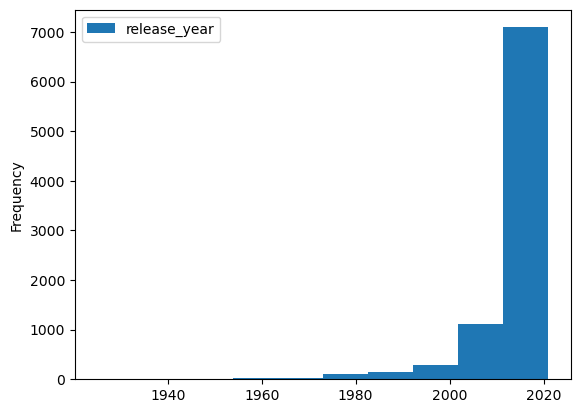

In [24]:
df.plot.hist()

# Busqueda de datos
- Uso de Where, endswith, replace

In [25]:
# Buscaremos los registros que tengan "min" y con ellos, se asignara los calores a la columna "duration_unit"

# el primer paso es definir en todas las unidades "min", esto luego se cambiara
df["duration_unit"] = "min"

In [26]:
# Comprobamos
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_num,duration_unit
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90 min,min
1,s2,TV Show,Blood & Water,,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2 Seasons,min


## Where / Endswith

In [27]:
# Usando where asignamos la duration_unit a min cuando es "min" y a "season" cuando es <> min
df["duration_unit"] = df["duration_unit"].where(df.duration_num.str.endswith("min"), "season")

In [28]:
# Comprobamos
df.sample(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_num,duration_unit
3366,s3367,Movie,Little Miss Sumo,Matt Kay,Hiyori Kon,United Kingdom,"October 28, 2019",2018,TV-G,20 min,"Documentaries, International Movies, Sports Mo...",In an ancient sport traditionally reserved for...,20 min,min
7688,s7689,Movie,P Se PM Tak,Kundan Shah,"Meenakshi Dixit, Indrajeet Soni, Bharat Jadhav...",India,"August 1, 2018",2015,TV-14,117 min,"Comedies, Independent Movies, International Mo...",A prostitute who is down on her luck gets caug...,117 min,min
3408,s3409,Movie,Tell Me Who I Am,Ed Perkins,,United Kingdom,"October 18, 2019",2019,TV-MA,86 min,Documentaries,"In this documentary, Alex trusts his twin, Mar...",86 min,min


## Replace

In [29]:
# Usamos replace para el reemplazo de los strings
# En este caso se reemplaza todas  las ocurrencias de min, Season y Seasons por blancos
df["duration_num"] = df["duration_num"].replace({" min":"", " Season":"", " Seasons":"", "s":""}, regex=True) # regex:Las expreciones regulares que asigno, se cumplan

In [30]:
df.sample(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_num,duration_unit
1281,s1282,Movie,Red,Tirumala Kishore,"Ram Pothineni, Nivetha Pethuraj, Malvika Sharm...",India,"February 23, 2021",2021,TV-14,143 min,"Dramas, International Movies",A murder investigation leads police to a photo...,143,min
5719,s5720,Movie,True Memoirs of an International Assassin,Jeff Wadlow,"Kevin James, Andy Garcia, Zulay Henao, Maurice...",United States,"November 11, 2016",2016,TV-14,98 min,"Action & Adventure, Comedies",After his publisher markets his crime novel as...,98,min
5239,s5240,Movie,Franca: Chaos and Creation,Francesco Carrozzini,,"United States, Italy","October 1, 2017",2016,TV-MA,79 min,"Documentaries, International Movies",A documentary filmmaker chronicles the life an...,79,min


In [31]:
# Validamos el contenido y el split que se hizo de la columna
df[["show_id", "type", "duration", "duration_num", "duration_unit"]].sample(10)

,show_id,type,duration,duration_num,duration_unit
1189,s1190,Movie,60 min,60,min
190,s191,Movie,125 min,125,min
7768,s7769,TV Show,1 Season,1,season
3501,s3502,TV Show,1 Season,1,season
6475,s6476,Movie,80 min,80,min
1239,s1240,Movie,119 min,119,min
4667,s4668,Movie,110 min,110,min
2345,s2346,Movie,52 min,52,min
3001,s3002,TV Show,1 Season,1,season
2258,s2259,TV Show,1 Season,1,season


In [32]:
# Cambiamos el tipo de columna de duration_num a numerico
df["duration_num"] = pd.to_numeric(df["duration_num"])

In [33]:
# Comprobamos
df.dtypes

show_id          string[python]
type             string[python]
title            string[python]
director         string[python]
cast             string[python]
country          string[python]
date_added       string[python]
release_year              int64
rating           string[python]
duration         string[python]
listed_in        string[python]
description      string[python]
duration_num            Float64
duration_unit            object
dtype: object

In [34]:
# Buscamos los valores NaN o nulos en duration_num
df.loc[df["duration_num"].isnull()] # loc: localiza los datos

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_num,duration_unit
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,,Movies,"Louis C.K. muses on religion, eternal love, gi...",<NA>,season
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,,Movies,Emmy-winning comedy writer Louis C.K. brings h...,<NA>,season
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,,Movies,The comic puts his trademark hilarious/thought...,<NA>,season


In [35]:
# Para las 3 peliculas nulas, se le asignara la duracion de la columna "rating"
# Con la funcion "at", se puede hacer los cambios de una manera 100% manual
# Muy util para cambios pequeños, omitirse para volumenes de datos mas amplios

    # ID   |  DataFrame     | Valor
df.at[5541, "duration_unit"] = "min"
df.at[5794, "duration_unit"] = "min"
df.at[5813, "duration_unit"] = "min"
    # ID   |  DataFrame     | Valor
df.at[5541, "duration_num"] = 74
df.at[5794, "duration_num"] = 84
df.at[5813, "duration_num"] = 66
    # ID   |  DataFrame     | Valor
df.at[5541, "duration"] = "74 min"
df.at[5794, "duration"] = "84 min"
df.at[5813, "duration"] = "66 min"


In [36]:
# Buscamos los nulos nuevamente
df.loc[df["duration_num"].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_num,duration_unit


In [37]:
df.describe()

,release_year,duration_num
count,8807.000000,8807.0
mean,2014.180198,69.84853
std,8.819312,50.806431
min,1925.000000,1.0
25%,2013.000000,2.0
50%,2017.000000,88.0
75%,2019.000000,106.0
max,2021.000000,312.0


<Axes: ylabel='Frequency'>

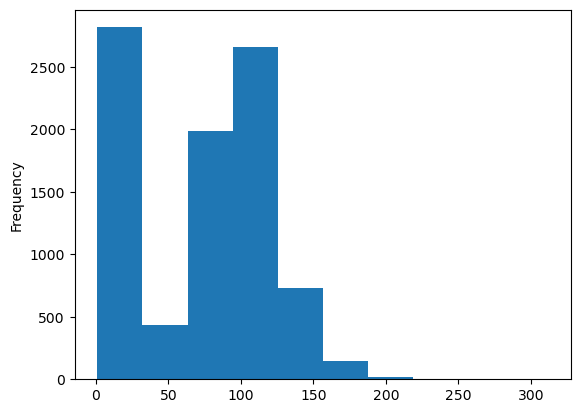

In [38]:
df.duration_num.plot.hist()

## Filtro de Datos
- loc, iloc
- Condicionales de filtrado de datos simples y multiples

In [87]:
# Queremos saber el total de peliculas
df.shape[0]

8807

In [88]:
# Buscaremos peliculas de 2 o mas horas de duracion
# Usaremos loc
df[["title", "country", "release_year", "duration"]].loc[df["duration_num"] > 120].sort_values(by="release_year")

,title,country,release_year,duration
542,Ujala,India,1959,143 min
7133,Jis Desh Men Ganga Behti Hai,,1960,181 min
7637,Ocean's Eleven,United States,1960,127 min
5220,Singapore,"India, Malaysia",1960,158 min
177,The Guns of Navarone,"United Kingdom, United States",1961,156 min
...,...,...,...,...
387,Mimi,,2021,132 min
372,Rurouni Kenshin: The Beginning,,2021,138 min
551,Haseen Dillruba,India,2021,136 min
500,Major Grom: Plague Doctor,,2021,138 min


In [44]:
# Filtro por año
df[["title", "country", "release_year", "duration"]].loc[(df["release_year"] == 1989)]

,title,country,release_year,duration
139,Do the Right Thing,United States,1989,120 min
603,The Karate Kid Part III,United States,1989,112 min
928,Best of the Best,United States,1989,97 min
1761,Little Monsters,United States,1989,102 min
2366,Alexandria: Again and Forever,"France, Egypt",1989,109 min
4233,Bill Hicks: Sane Man,United States,1989,81 min
4554,Parrot Sketch Not Included: Twenty Years of Mo...,United Kingdom,1989,72 min
5304,Mujrim,India,1989,163 min
5948,The Ryan White Story,United States,1989,94 min
6013,300 Miles to Heaven,"Denmark, France, Poland",1989,93 min


In [45]:
# Multiples condiciones
df[["title", "country", "release_year", "duration"]].loc[(df["release_year"] == 1989) & (df["country"] == "India")]


,title,country,release_year,duration
5304,Mujrim,India,1989,163 min
7387,Maine Pyar Kiya,India,1989,192 min


In [ ]:
df[["title", "country", "release_year", "duration_num"]].loc[df["country"] == "Argentina"]

<Axes: ylabel='Frequency'>

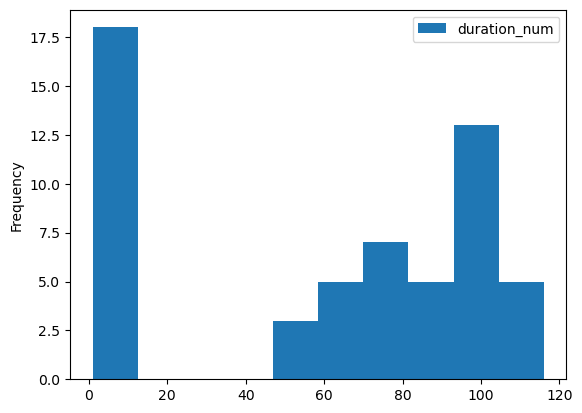

In [55]:
df[["title", "country", "duration_num"]].loc[df["country"] == "Argentina"].plot.hist()

In [ ]:
df[["title", "country", "duration_num"]].loc[(df["country"] == "Argentina") & (df["type"] == "Movie")].plot.hist(by="duration_num", bins=30)

In [ ]:
# Count me da el numero de registros por columna
df.count()

show_id          8807
type             8807
title            8807
director         8807
cast             8807
country          8807
date_added       8807
release_year     8807
rating           8807
duration         8807
listed_in        8807
description      8807
duration_num     8807
duration_unit    8807
dtype: int64

In [61]:
# Quiero saber cuantas son esas peliculas de mas de dos horas usando count
df.duration_num.loc[df["duration_num"] > 120].count()

np.int64(1142)

In [62]:
# Se pueden ordenar los datos
df[["show_id", "type","title","country","release_year", "duration"]].sort_values(by="release_year", ascending=False)

,show_id,type,title,country,release_year,duration
1,s2,TV Show,Blood & Water,South Africa,2021,2 Seasons
2,s3,TV Show,Ganglands,,2021,1 Season
3,s4,TV Show,Jailbirds New Orleans,,2021,1 Season
31,s32,TV Show,Chicago Party Aunt,,2021,1 Season
30,s31,Movie,Ankahi Kahaniya,,2021,111 min
...,...,...,...,...,...,...
8739,s8740,Movie,Why We Fight: The Battle of Russia,United States,1943,82 min
8660,s8661,Movie,Undercover: How to Operate Behind Enemy Lines,United States,1943,61 min
7790,s7791,Movie,Prelude to War,United States,1942,52 min
8205,s8206,Movie,The Battle of Midway,United States,1942,18 min


In [66]:
# El siguiente ejemplo nos servira para saber el numero de peliculas por año
# ademas con el comando rename puedo definir el nombre de la columna nueva que se esta agregando
df_temp = df.groupby("release_year").size().rename("movies").reset_index()

# Obtencion de los ultimos 20 años
df_temp2 = df.groupby("release_year").size().rename("movies").reset_index().sort_values(by="release_year", ascending=False)[0:20]

df_temp

,release_year,movies
0,1925,1
1,1942,2
2,1943,3
3,1944,3
4,1945,4
...,...,...
69,2017,1032
70,2018,1147
71,2019,1030
72,2020,953


In [64]:
# Obtenemos los maximos
df_temp.max()

release_year    2021
movies          1147
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

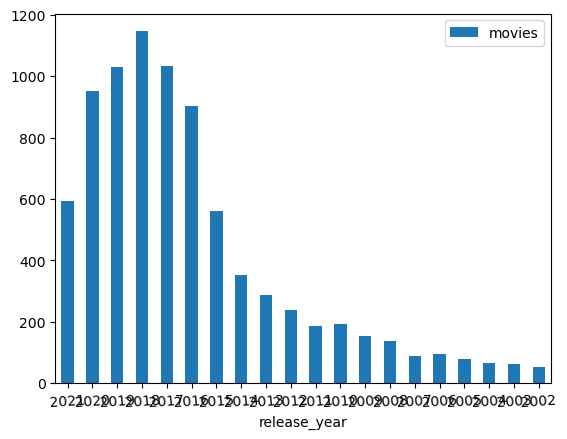

In [67]:
# Grafico simple
import matplotlib.pyplot as plt
ax = df_temp2.plot.bar(x="release_year", y="movies", rot=4)
plt.show

## Insersion, Eliminado y Editado de datos

In [89]:
# Nuevo DF
clase = [("Jorge", 22, "MX"),
         ("Julieta", 24, "SP"),
         ("Josselin", 23, "MX"),
         ("Mariana", 20, "COL"),
         ("Esteban", 30, "BR"),
         ("Mike", 33, "MX"),
         ("Carina", 23, "BR"),
         ("Aldo", 23, "EC"),
         ("Omar", 32, "COL"),
         ("Marta", 25, "EC")
         ]

df_clase = pd.DataFrame(clase, columns=["Nombre", "Edad", "Pais"],)

In [90]:
type(df_clase)

pandas.core.frame.DataFrame

In [92]:
df_clase

,Nombre,Edad,Pais
0,Jorge,22,MX
1,Julieta,24,SP
2,Josselin,23,MX
3,Mariana,20,COL
4,Esteban,30,BR
5,Mike,33,MX
6,Carina,23,BR
7,Aldo,23,EC
8,Omar,32,COL
9,Marta,25,EC


In [ ]:
# Ordenamos la clase por edad
df_clase.sort_values(by="Edad")

### Insercion

In [94]:
# Agregacion de nuevos alumnos
# Creamos un nuevo alumno como diccionario
nuevo_alumno = {"Nombre": "Israel", "Edad":41, "Pais":"CND"}

# Convertimos a DF
nuevo_alumno = pd.DataFrame([nuevo_alumno])

# Concatenamos al original
df_clase = pd.concat([df_clase, nuevo_alumno], ignore_index=True)

In [95]:
df_clase

,Nombre,Edad,Pais
0,Jorge,22,MX
1,Julieta,24,SP
2,Josselin,23,MX
3,Mariana,20,COL
4,Esteban,30,BR
5,Mike,33,MX
6,Carina,23,BR
7,Aldo,23,EC
8,Omar,32,COL
9,Marta,25,EC


In [109]:
# Con loc
df_clase.loc[len(df_clase)] = ['Paulo', 48, 'COL']
df_clase

,Nombre,Edad,Pais
0,Jorge,22,MX
1,Julieta,32,ARG
2,Josselin,32,ARG
3,Mariano,20,COL
4,Esteban,30,BR
5,Mike,33,MX
6,Carina,23,BR
7,Aldo,23,EC
8,Omar,32,COL
9,Marta,25,EC


### Eliminado

In [110]:
# Para eliminar un registro, basandonos en el indice
df_clase = df_clase.drop(df_clase.index[10])

In [111]:
df_clase

,Nombre,Edad,Pais
0,Jorge,22,MX
1,Julieta,32,ARG
2,Josselin,32,ARG
3,Mariano,20,COL
4,Esteban,30,BR
5,Mike,33,MX
6,Carina,23,BR
7,Aldo,23,EC
8,Omar,32,COL
9,Marta,25,EC


In [102]:
# Para eliminar multiples indices
df_clase.drop(df_clase.index[[8, 9]])

,Nombre,Edad,Pais
0,Jorge,22,MX
1,Julieta,24,SP
2,Josselin,23,MX
3,Mariana,20,COL
4,Esteban,30,BR
5,Mike,33,MX
6,Carina,23,BR
7,Aldo,23,EC


### Editado

In [104]:
# Para modificar registros
# Se puede localizar con .at
df_clase.at[3, "Nombre"] = " Mariano"

In [105]:
df_clase

,Nombre,Edad,Pais
0,Jorge,22,MX
1,Julieta,24,SP
2,Josselin,23,MX
3,Mariano,20,COL
4,Esteban,30,BR
5,Mike,33,MX
6,Carina,23,BR
7,Aldo,23,EC
8,Omar,32,COL
9,Marta,25,EC


In [106]:
# PAra mas de un registro se puede usar .loc y ademas hacerlo para multiples columans
df_clase.loc[1:2, ["Edad", "Pais"]] = [32, "ARG"]

In [107]:
df_clase

,Nombre,Edad,Pais
0,Jorge,22,MX
1,Julieta,32,ARG
2,Josselin,32,ARG
3,Mariano,20,COL
4,Esteban,30,BR
5,Mike,33,MX
6,Carina,23,BR
7,Aldo,23,EC
8,Omar,32,COL
9,Marta,25,EC


In [113]:
# Por ultimo, replace
df_clase = df_clase.replace('BR', 'BRA')
df_clase

,Nombre,Edad,Pais
0,Jorge,22,MX
1,Julieta,32,ARG
2,Josselin,32,ARG
3,Mariano,20,COL
4,Esteban,30,BRA
5,Mike,33,MX
6,Carina,23,BRA
7,Aldo,23,EC
8,Omar,32,COL
9,Marta,25,EC
